# Central Limit Theorem - the core method to resolve uncertainty

One of the interview questions for data analysts: Explain the Central Limit Theorem.

Let's start with a sad fact - if you don't want to know about CLT, you don't need a data analyst in your company, because accidents are really accidental for you. In this scenario, statistics will be a sort of magic for you, and you won't ever understand how your changes made a real statistically significant impact. But also, you're losing responsibility and can manipulate data as you want. You don't have to approve your words; you can take any comfortable date range and interpret the A/B testing results - nobody can prove you wrong: the world is manipulated by God, Destiny, or Luck.

But this is not the way we, data analysts, see the world. And the main understanding comes from the Central Limit Theorem and the Law of Large Numbers.

Imagine you visit some gym and see the picture attached on one of the exercise machines. It seems many people use weights between 40 and 50 kg. You want to watch if this is true, choosing samples of random people. You mark the exercise machine with invisible inks to see which weights they prefer (let's also consider they don't change their weights for simplification, but in the end it doesn't matter).

## Import libraries

In [171]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Let's generate normal distribution of the exersice machine

Average:  45.000705
10 first people results
[50 30 55 60 15 25 45 40 45 30]


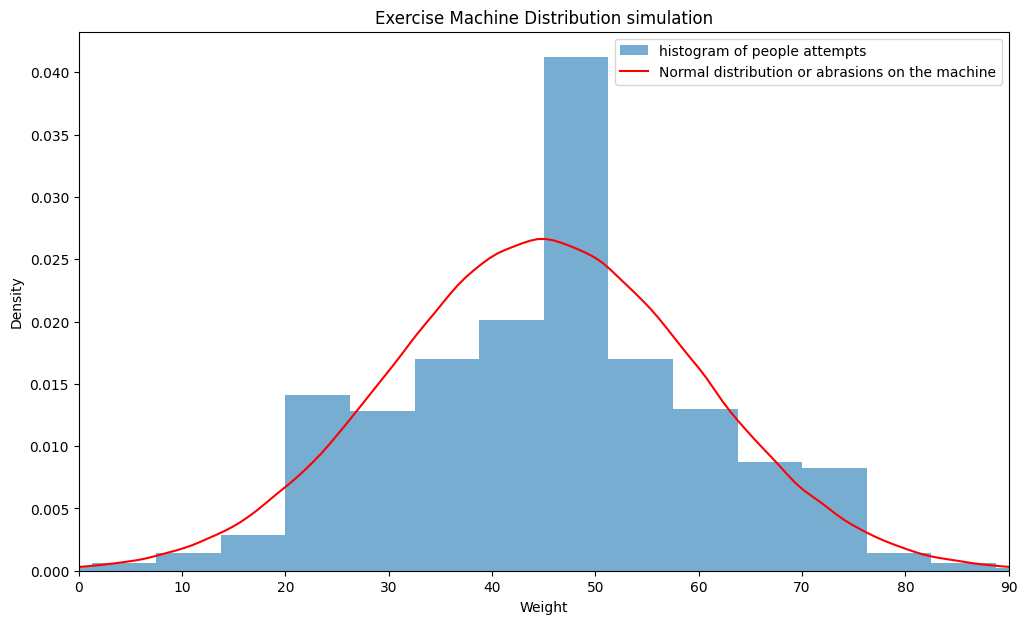

In [172]:
rng = np.random.default_rng(42)
exersice_sample = rng.normal(loc=45, scale=15, size=1000000)
exersice_sample_cont = exersice_sample
exersice_sample = (np.round(exersice_sample / 5) * 5).astype(int)
exersice_sample = exersice_sample.astype(int)
print('Average: ',exersice_sample.mean())
print('10 first people results')
print(exersice_sample[:10])
fig, ax = plt.subplots(figsize=(12,7))
bins = np.linspace(exersice_sample.min(), exersice_sample.max(), 25)
ax.hist(exersice_sample, bins=bins, density=True, alpha=0.6,label='histogram of people attempts')
sns.kdeplot(exersice_sample_cont, ax=ax,color='red',label='Normal distribution or abrasions on the machine') 
plt.title('Exercise Machine Distribution simulation')
plt.xlabel('Weight')
plt.xlim([0,90])
plt.legend()
plt.savefig('simulation.png')
plt.show()


We want to analyse the first 3 people's results, and we see it's:

In [173]:
print("3 first people's results")
ssample = exersice_sample[:3]
print(ssample)
print('Average:',round(ssample.mean(),1))

3 first people's results
[50 30 55]
Average: 45.0


Then for the next 3:

In [174]:
print("Next 3 people's results")
ssample = exersice_sample[3:6]
print(ssample)
print('Average:',round(ssample.mean(),1))

Next 3 people's results
[60 15 25]
Average: 33.3


Some mess is coming - the results are anomaly different. Let's take more people in our sample

In [175]:
print("Next 10 people's results")
ssample = exersice_sample[6:16]
print(ssample)
print('Average:',round(ssample.mean(),1))

Next 10 people's results
[45 40 45 30 60 55 45 60 50 30]
Average: 46.0


And next 10:

In [176]:
print("Next 10 people's results")
ssample = exersice_sample[16:26]
print(ssample)
print('Average:',round(ssample.mean(),1))

Next 10 people's results
[50 30 60 45 40 35 65 45 40 40]
Average: 45.0


It seems our averages are closer now, and one of them even has the average of 45. What if we take even more people?

In [177]:
print("Next 100 people's results")
ssample = exersice_sample[26:126]
print('Average:',round(ssample.mean(),1))

Next 100 people's results
Average: 44.4


In [178]:
print("Next 100 people's results")
ssample = exersice_sample[126:226]
print('Average:',round(ssample.mean(),1))

Next 100 people's results
Average: 44.7


It seems our average is getting closer to our hypothesized mean of 45 — and this is the Law of Large Numbers. It states that the average of results obtained from a large number of independent random samples converges to the true value, if it exists. So, the more people we include in our experiments, the closer our sample mean will be to the true mean.

But what will happen if we will be taking random samples of 100 people and put their means on the frequency chart (X axis represents the value, Y represents the frequency every average appeared)?

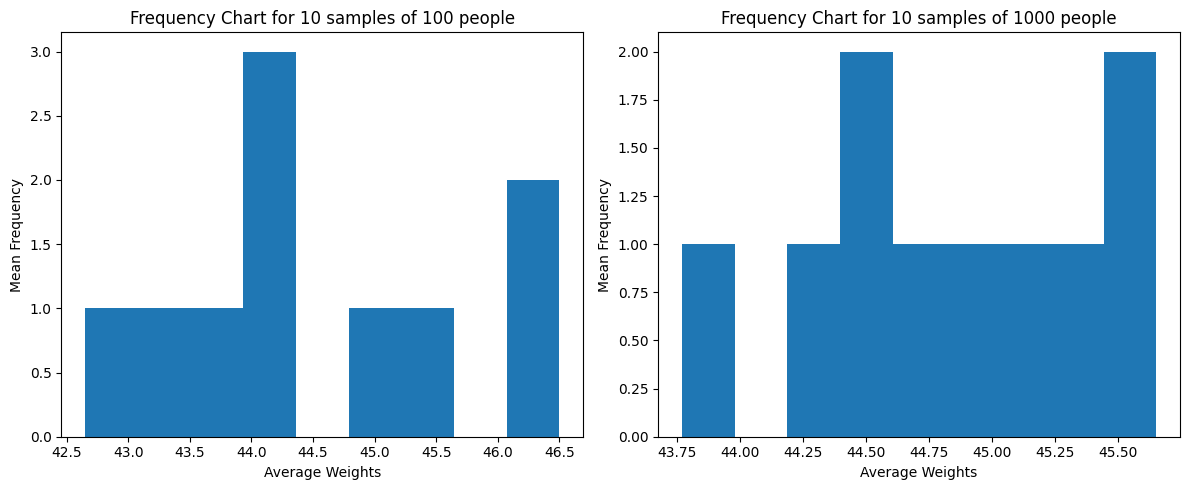

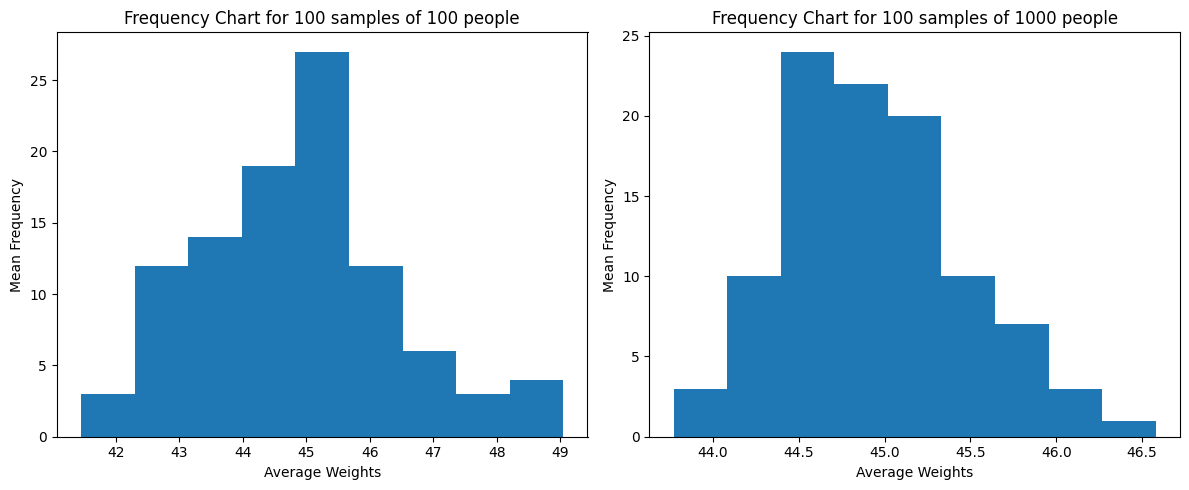

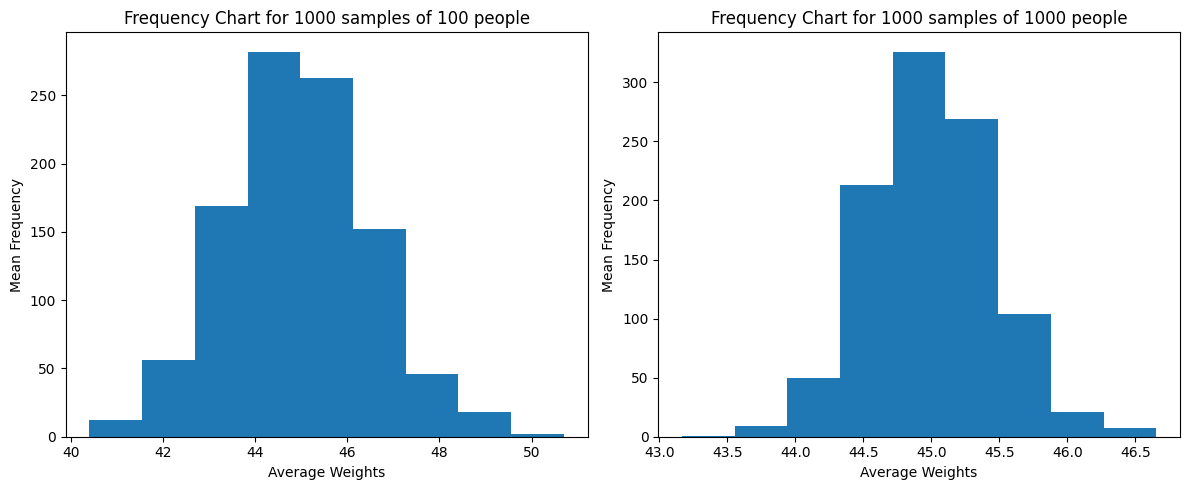

In [179]:

def build_ssample_chart(j):
    k=100
    ssample_chart = []
    plt.figure(figsize=(12, 5))
    for i in range(j):
        ssample = exersice_sample[i*k:(i+1)*k]
        ssample_chart.append(ssample.mean())
    plt.subplot(1, 2, 1)
    bins = np.linspace(min(ssample_chart), max(ssample_chart), 10)
    plt.hist(ssample_chart,bins=bins)
    plt.title(f'Frequency Chart for {j} samples of {k} people')
    plt.xlabel('Average Weights')
    plt.ylabel('Mean Frequency')
    k=1000
    ssample_chart = []
    for i in range(j):
        ssample = exersice_sample[i*k:(i+1)*k]
        ssample_chart.append(ssample.mean())
    plt.subplot(1, 2, 2)
    bins = np.linspace(min(ssample_chart), max(ssample_chart), 10)
    plt.hist(ssample_chart,bins=bins)
    plt.title(f'Frequency Chart for {j} samples of {k} people')
    plt.xlabel('Average Weights')
    plt.ylabel('Mean Frequency')
    plt.tight_layout()
    plt.savefig(f'chart_{i}_{k}.png')
    plt.show()

build_ssample_chart(10)
build_ssample_chart(100)
build_ssample_chart(1000)

    

You see, our distribution of averages is becoming more bell-shaped, symmetric, and concentrated around the mean, like a normal distribution. This is the Central Limit Theorem. It states that, under appropriate conditions, the distribution of a normalized version of the sample mean converges to a standard normal distribution.

## PPC Marketing Example: Basics of A/B Testing

Now, let’s connect this to something more practical — for example, **PPC marketing**. Imagine you are running Google Ads campaigns and want to know whether changing the color of your “Buy Now” button will increase your **conversion rate**. You can’t just guess — you need data, and this is where A/B testing comes in.  

Suppose you have **two versions of a landing page**:  

- **Version A:** Original button (control)  
- **Version B:** New button color (treatment)  

You randomly split your website visitors so that **half see Version A** and **half see Version B**. After a week, you collect the number of conversions for each version.  

| Version | Visitors | Conversions | Conversion Rate |
|---------|----------|------------|----------------|
| A       | 500      | 50         | 10%            |
| B       | 500      | 60         | 12%            |

At first glance, Version B seems better — but is it **statistically significant**? Could the difference of 2% just be due to **random chance**?  

This is exactly where the **Central Limit Theorem (CLT)** helps. The CLT tells us that if we repeatedly take random samples of visitors and calculate the **conversion rate** for each sample, the **distribution of these sample means** will approach a normal distribution. This allows us to:  

1. Calculate the **standard error** of the conversion rate.  
2. Build a **confidence interval** around the sample mean.  
3. Test hypotheses — for example:  
   - Null hypothesis: Version B is no better than Version A.  
   - Alternative hypothesis: Version B increases conversion rate.  

If the confidence interval for Version B **does not overlap** with Version A, we can conclude that the improvement is **unlikely due to chance** — it’s statistically significant.  

In simpler terms: **A/B testing + Central Limit Theorem = knowing whether your PPC change actually works, rather than just guessing.**  

So next time you tweak ad copy, button color, or targeting settings, remember: CLT is your friend. It turns **random website clicks** into **actionable insights** and prevents you from being misled by small random fluctuations in your data.
